In [1]:
import sys
sys.path.append('../../../../../')
from plot_tools.fig_preamble import * # imports numpy, matplotlib, Py2PDF, plot_helper_funcs, plot_figstyle_sheet

/home/riddhisw/anaconda2/lib/python2.7/site-packages/matplotlib/lines.py:1206: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self._markerfacecolor != fc:
/home/riddhisw/anaconda2/lib/python2.7/site-packages/matplotlib/lines.py:1182: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self._markeredgecolor != ec:


#### Paths ####

In [2]:
ver=0
datapath = '../../../../DATA_v'+str(ver)+'_/' #v'+str(ver)+'/DATA_v'+str(ver)+'/'
savefig = '../svg/paper_v0_'
figdata = '../svg/fig_data/paper_v0_'
figname = 'spec_recon'

#### Figure: LSF and AKF for f0B/J (Reducing Prediction Horizon) ####

In [3]:
## Data
test_case_list = [24, 24, 24, 24]
variation_list = [1, 2, 4, 7]
#case_labels = ['(e)', '(f)', '(g)', '(h)']
case_labels = ['', '', '', '']
case_ratios = [0.2, 0.4, 0.8, 2.0]

LSF: Data Loaded? Yes
AKF: Data Loaded? Yes
LKFFB: Data Loaded? Yes
LSF
AKF
I am in RISK DICT and test case and variations are: 24 1
Got here too
Total coeff 836.06573222 1.36454556064
(100,)
LKFFB
I am in RISK DICT and test case and variations are: 24 1


../../../../../data_tools/data_tuned_run_analysis.py:281: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if (freq_basis_array == None) and (instantA == None):


(100,)
LSF: Data Loaded? Yes
AKF: Data Loaded? Yes
LKFFB: Data Loaded? Yes
LSF
AKF
I am in RISK DICT and test case and variations are: 24 2
Got here too
Total coeff 30508.8462372 24.8967928531
(100,)
LKFFB
I am in RISK DICT and test case and variations are: 24 2
(100,)
LSF: Data Loaded? Yes
AKF: Data Loaded? Yes
LKFFB: Data Loaded? Yes
LSF
AKF
I am in RISK DICT and test case and variations are: 24 4
Got here too
Total coeff 23.4098238481 0.00955181212923
(100,)
LKFFB
I am in RISK DICT and test case and variations are: 24 4
(100,)
LSF: Data Loaded? Yes
AKF: Data Loaded? Yes
LKFFB: Data Loaded? Yes
LSF
AKF
I am in RISK DICT and test case and variations are: 24 7
Got here too
Total coeff 162.495024666 0.0265208650456
(100,)
LKFFB
I am in RISK DICT and test case and variations are: 24 7
(100,)


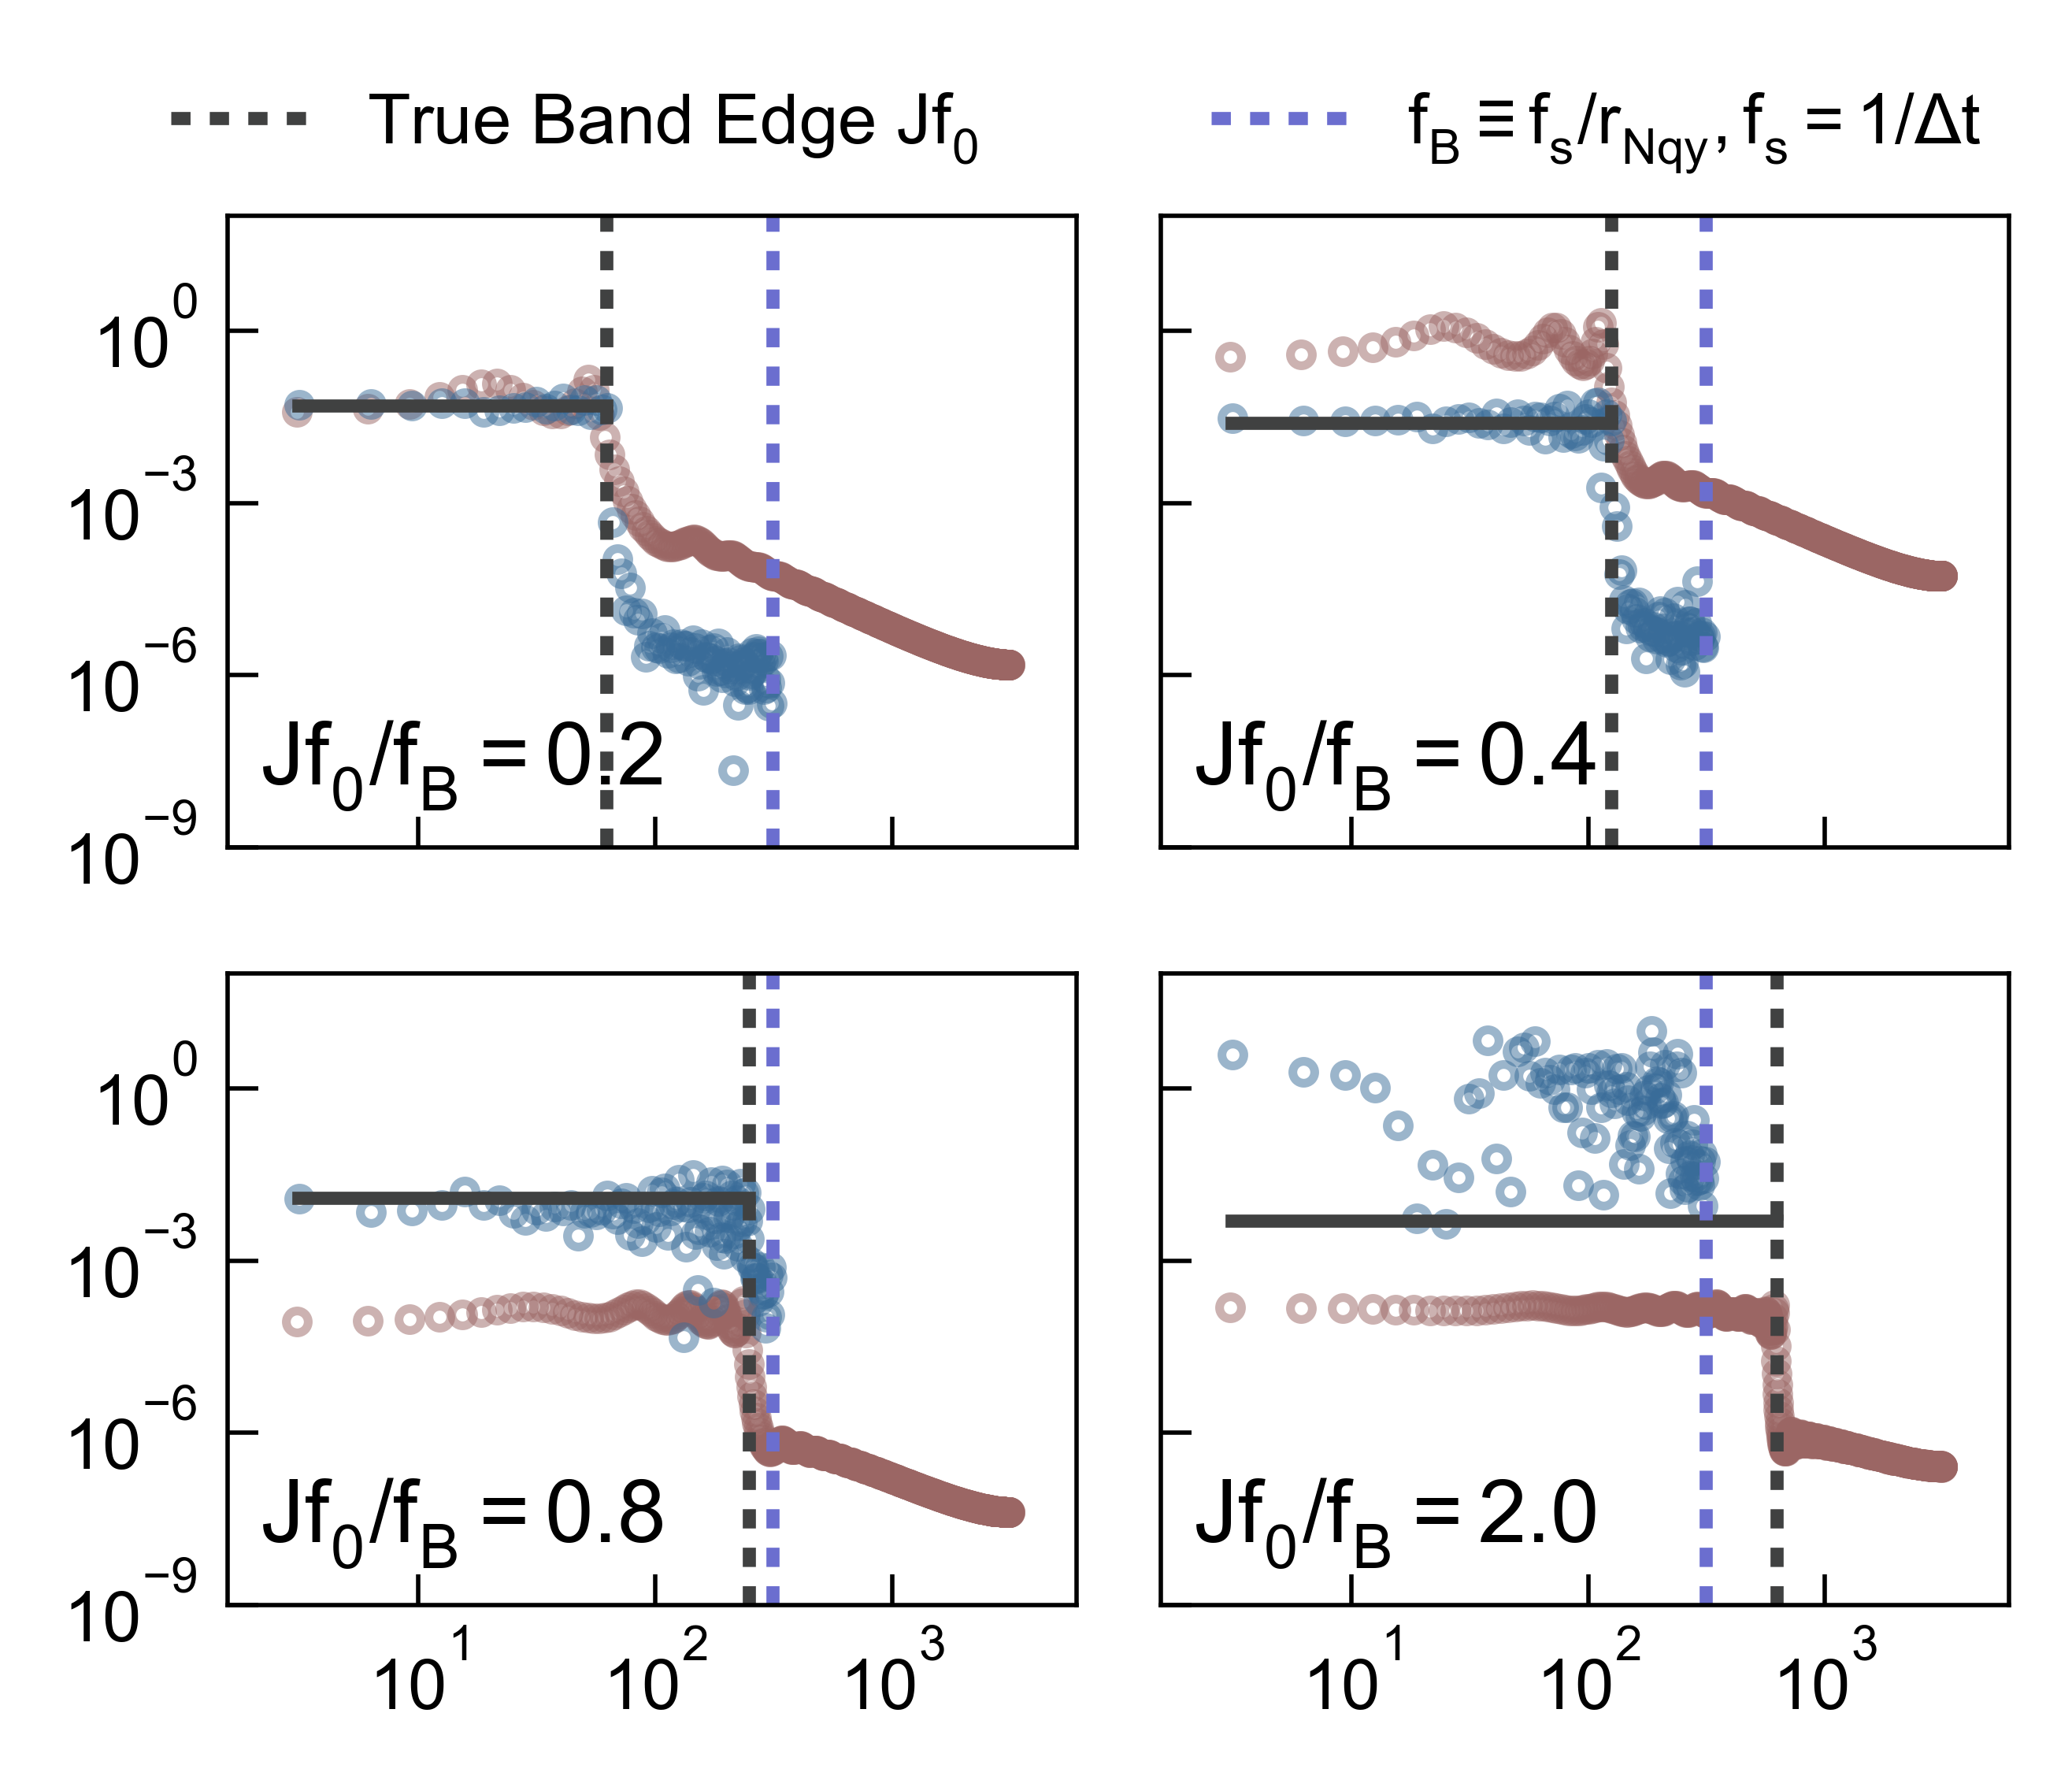

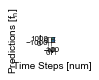

In [4]:
## Fig Setup
nrows = 2
ncols = 2

gs = gridspec.GridSpec(2, 2,
                       left=0.15, right=0.985, 
                       top=0.9, bottom=0.1, 
                       wspace=0.1, hspace=0.2)

# gs = gridspec.GridSpec(nrows, ncols,
#                        left=0.2, right=0.96, 
#                        top=0.9, bottom=0.15, 
#                        wspace=0.1, hspace=0.15)

fig = plt.figure(figsize=(cm2inch(8.6), cm2inch(7.)), dpi=my_dpi)

dumpfig = plt.figure(figsize=(0.1, 0.1))
dumpax = dumpfig.add_subplot(121)
dumpax2 = dumpfig.add_subplot(122)

vars()['ax_0']  = fig.add_subplot(gs[ 0,0])
vars()['ax_1']  = fig.add_subplot(gs[ 0,1]) 
vars()['ax_2']  = fig.add_subplot(gs[ 1,0])
vars()['ax_3']  = fig.add_subplot(gs[ 1,1]) 

algolist = ['LSF', 'AKF', 'LKFFB']
for idx_c in xrange(len(test_case_list)):
   
    # Single Predictions
    
    fig_data_name = figdata+figname+'_tc_'+str(test_case_list[idx_c])+'_v_'+str(variation_list[idx_c])
    
    dumpax2, vars()['ax_'+str(idx_c)] = psp(dumpax2, vars()['ax_'+str(idx_c)],  ['LSF', 'AKF', 'LKFFB'], 
                                           test_case_list[idx_c], variation_list[idx_c], 
                                           datapath, GPRP_load='No', ylim_amps = [-9, 2], 
                                         save_data=fig_data_name,
                                           fstep=50, sstep=50, lowloss=20)
    
    vars()['ax_'+str(idx_c)].text(0.01, 0.1, case_labels[idx_c] + r' $ J f_0 /f_B = $%s'%(case_ratios[idx_c]), 
                                  fontsize=Fsize, transform=vars()['ax_'+str(idx_c)].transAxes)
    # Formatting
    
    vars()['ax_'+str(idx_c)].legend_.remove()
    vars()['ax_'+str(idx_c)].set_xlim([0.25*2*np.pi, 6*10**3])
    vars()['ax_'+str(idx_c)].set_xscale('log')
    vars()['ax_'+str(idx_c)].minorticks_off()
    vars()['ax_'+str(idx_c)] = set_font_sizes(vars()['ax_'+str(idx_c)], fsize, Fsize)

# vars()['ax_'+str(0)].text(0.5, 1.1, 'Spectrum Reconstruction', 
#                                   fontsize=Fsize, transform=vars()['ax_'+str(0)].transAxes)

vars()['ax_'+str(0)].set(xticklabels=[], xlabel='', ylabel='')
vars()['ax_'+str(1)].set(xticklabels=[],  xlabel='', ylabel='', yticklabels=[])
vars()['ax_'+str(3)].set(xlabel='', ylabel='', yticklabels=[])
vars()['ax_'+str(2)].set(xlabel='', ylabel='')

vars()['ax_'+str(0)].legend(handles=SPEC_EST_H,labels=SPEC_EST_L,
                                      loc=3,  fontsize=fsize, frameon=False, bbox_to_anchor=(-0.1, 1.02, 2.2, .102), 
                                      ncol=2, mode="expand", borderaxespad=0.)
fig.savefig(savefig+figname+'.svg', format='svg', dpi=my_dpi)
plt.show()
plt.close()



fig1 = plt.figure(figsize=(cm2inch(15),cm2inch(0.8)), dpi=my_dpi)

ax = fig1.add_subplot(111)
lgd=ax.legend(handles=SPEC_EST_H,
       labels=SPEC_EST_L,
       bbox_to_anchor=(0.3, 0, 0.0,1.1), loc=2, ncol=4, frameon=True, fontsize=fsize, 
       facecolor='white', edgecolor='white')
ax.set_frame_on(False)
ax.tick_params(bottom='off', left='off', labelbottom='off', labelleft='off')

fig1.savefig(savefig+figname+'lgnd.svg', format='svg', dpi=my_dpi)
plt.show()
plt.close()